In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [2]:
import pandas as pd; import matplotlib.pyplot as plt
data = pd.read_csv('/Users/elisefox/Desktop/Data Science/ps05-foxel03/titanic.csv')
print(data.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [94]:
data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [42]:
print(577+314, 314/891, 577/891)

891 0.35241301907968575 0.6475869809203143


Your written answer:

 - <891 passengers>
 - <64.8% of passengers were male>
 - <35.2% of passengers were female>

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [88]:
fsurvived = data[data['Sex'] == 0]['Survived'].mean()
msurvived = data[data['Sex'] == 1]['Survived'].mean()
print(fsurvived, msurvived)

0.7420382165605095 0.18890814558058924


Your written answer:

 - <74.2% of females survived>
 - <18.9% of males survived>

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [80]:
data.groupby('Pclass').agg({'Pclass': 'size', 'Survived': 'mean'})

,Pclass,Survived
Pclass,,
1,216,0.629630
2,184,0.472826
3,491,0.242363


In [82]:
print(216/891, 184/891, 491/891)

0.24242424242424243 0.20650953984287318 0.5510662177328844


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.1%
    - % survivorship: 24.23%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [12]:
'''Your code here'''
survivors_df = data[data['Survived'] == 1][['Age', 'Name', 'Sex']]
nonsurvivors_df = data[data['Survived'] == 0][['Age', 'Name', 'Sex']]

In [14]:
nonsurvivors_df.head()

,Age,Name,Sex
0,22.0,"Braund, Mr. Owen Harris",1
4,35.0,"Allen, Mr. William Henry",1
5,30.0,"Moran, Mr. James",1
6,54.0,"McCarthy, Mr. Timothy J",1
7,2.0,"Palsson, Master. Gosta Leonard",1


In [16]:
survivors_df.head()

,Age,Name,Sex
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
2,26.0,"Heikkinen, Miss. Laina",0
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
8,27.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0
9,14.0,"Nasser, Mrs. Nicholas (Adele Achem)",0


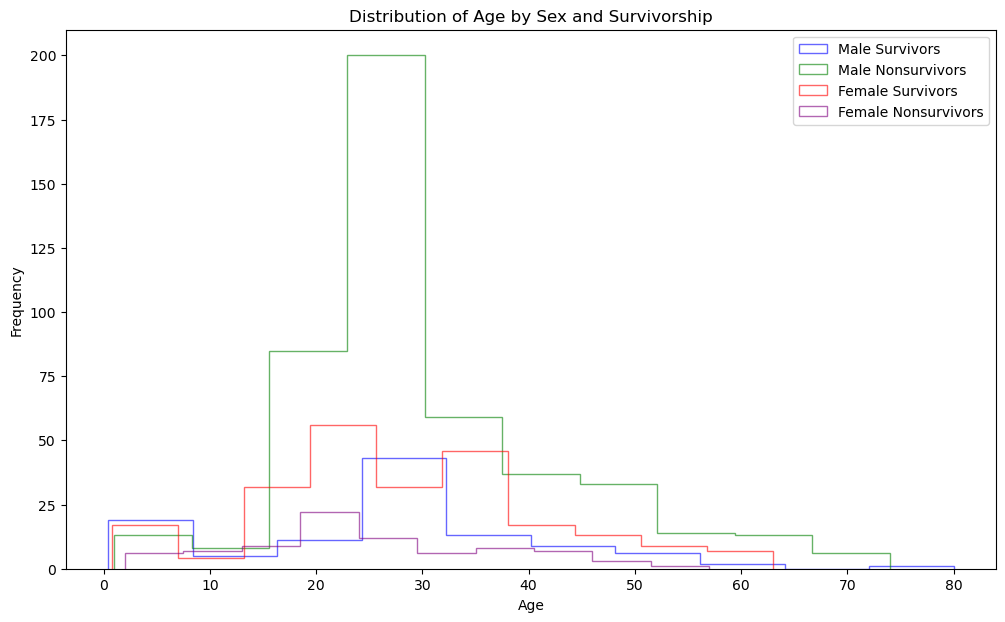

In [62]:
male_lucky = data[(data['Survived'] == 1) & (data['Sex'] == 1)]['Age']
male_unlucky = data[(data['Survived'] == 0) & (data['Sex'] == 1)]['Age']
female_lucky = data[(data['Survived'] == 1) & (data['Sex'] == 0)]['Age']
female_unlucky = data[(data['Survived'] == 0) & (data['Sex'] == 0)]['Age']

plt.figure(figsize=(12,7))

plt.hist(male_lucky.dropna(), color='blue', alpha=0.6, label='Male Survivors', histtype='step')
plt.hist(male_unlucky.dropna(), color='green', alpha=0.6, label='Male Nonsurvivors', histtype='step')
plt.hist(female_lucky.dropna(), color='red', alpha=0.6, label='Female Survivors', histtype='step')
plt.hist(female_unlucky.dropna(), color='purple', alpha=0.6, label='Female Nonsurvivors', histtype='step')

plt.title('Distribution of Age by Sex and Survivorship')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [ ]:
'''Your code here'''

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 